**POSTTEST 4 - Kecerdasan Buatan**

- Nama : Muhammad Akhyat Tariq Razan
- NIM  : 2309106119

## A1. Persiapan Data

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
df = pd.read_csv("online_gaming_behavior_dataset.csv")
df.head()

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


#### Identifikasi Kolom Numerik dan Kategorikal
Langkah ini digunakan agar proses preprocessing dapat diterapkan secara tepat:  
kolom numerik akan distandarisasi, dan kolom kategorikal akan diubah menjadi bentuk numerik dengan One-Hot Encoding.

In [66]:
X = df.drop(columns=['PlayerID', 'EngagementLevel'])
y = df['EngagementLevel']
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=np.number).columns.tolist()
print("Kolom kategorikal:", cat_cols)
print("Kolom numerik:", num_cols)

Kolom kategorikal: ['Gender', 'Location', 'GameGenre', 'GameDifficulty']
Kolom numerik: ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']


### Pemisahan Fitur dan Target
Kolom target (`y`) dipisahkan dari fitur (`X`).  
Kemudian data dibagi menjadi data latih (train) dan data uji (test) dengan proporsi 80:20 agar model dapat dievaluasi dengan baik.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

## A.2 Preprocessing & Model

#### Membuat Preprocessor
Preprocessor akan menyiapkan data sebelum masuk ke model.  
- Kolom numerik → distandarisasi menggunakan `StandardScaler`.  
- Kolom kategorikal → dikonversi ke bentuk numerik dengan `OneHotEncoder`.

In [68]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

#### Support Vector Classifier (SVC)
Model SVC digunakan untuk melakukan klasifikasi berdasarkan data perilaku pemain.  
Model ini mencari hyperplane terbaik yang memisahkan kelas dengan margin maksimum.

#### Evaluasi SVC
Evaluasi dilakukan menggunakan Confusion Matrix dan Classification Report.  
Hasilnya menunjukkan seberapa baik model mengenali setiap kategori perilaku pemain.

#### Visualisasi Hasil Prediksi SVC
Visualisasi menggunakan heatmap untuk menunjukkan jumlah prediksi benar dan salah antar kelas.


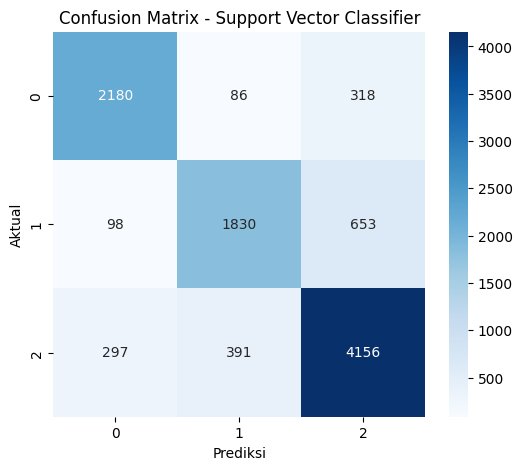

In [69]:
svc_pipe = Pipeline([
    ('pre', preprocessor),
    ('svc', LinearSVC(max_iter=5000, random_state=42))
])

svc_pipe.fit(X_train, y_train)
y_pred_svc = svc_pipe.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

### Analisis Support Vector Classifier (SVC)

Model **Support Vector Classifier (SVC)** digunakan untuk mengklasifikasikan perilaku pemain game online berdasarkan fitur-fitur seperti waktu bermain, tingkat interaksi, dan preferensi bermain.  

Berdasarkan hasil **Confusion Matrix**, terlihat bahwa sebagian besar data berhasil diklasifikasikan dengan benar (nilai diagonal paling besar), menandakan model cukup akurat.  
Dari **Classification Report**, nilai precision dan recall yang seimbang menunjukkan bahwa model mampu mengenali tiap kategori dengan baik.

Secara keseluruhan, SVC memberikan performa klasifikasi yang stabil pada dataset ini dan efektif dalam memisahkan kategori perilaku pemain.


####  Random Forest Classifier
Random Forest merupakan metode ensemble yang menggabungkan banyak decision tree.  
Cocok untuk dataset campuran numerik dan kategorikal seperti data perilaku pemain game online.

####  Evaluasi & Visualisasi RF
Menampilkan hasil evaluasi dan visualisasi Confusion Matrix untuk model Random Forest.

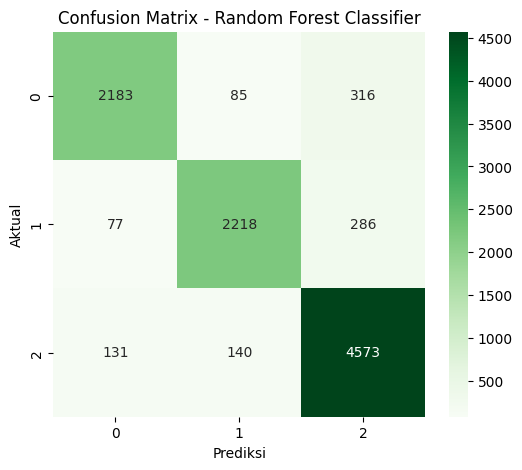

In [70]:
rf_pipe = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

### Analisis Support Vector Classifier (SVC)

Model **Support Vector Classifier (SVC)** digunakan untuk mengklasifikasikan perilaku pemain game online berdasarkan fitur-fitur seperti waktu bermain, tingkat interaksi, dan preferensi bermain.  

Berdasarkan hasil **Confusion Matrix**, terlihat bahwa sebagian besar data berhasil diklasifikasikan dengan benar (nilai diagonal paling besar), menandakan model cukup akurat.  
Dari **Classification Report**, nilai precision dan recall yang seimbang menunjukkan bahwa model mampu mengenali tiap kategori dengan baik.

Secara keseluruhan, SVC memberikan performa klasifikasi yang stabil pada dataset ini dan efektif dalam memisahkan kategori perilaku pemain.

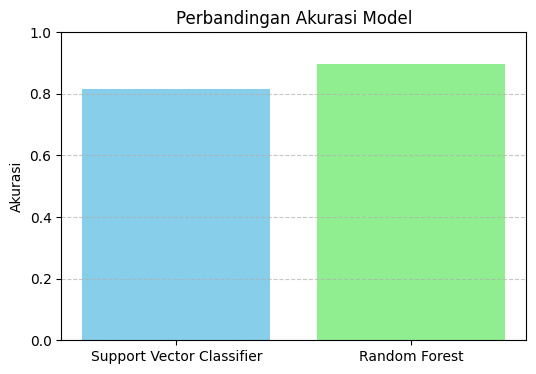

In [71]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_scores = {
    "Support Vector Classifier": accuracy_score(y_test, y_pred_svc),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

plt.figure(figsize=(6,4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['skyblue', 'lightgreen'])
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## A.3 Evaluasi Model

In [72]:
from sklearn.metrics import classification_report, confusion_matrix

print(" Support Vector Classifier ")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

print("\n Random Forest ")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

 Support Vector Classifier 
              precision    recall  f1-score   support

        High       0.85      0.84      0.85      2584
         Low       0.79      0.71      0.75      2581
      Medium       0.81      0.86      0.83      4844

    accuracy                           0.82     10009
   macro avg       0.82      0.80      0.81     10009
weighted avg       0.82      0.82      0.81     10009

[[2180   86  318]
 [  98 1830  653]
 [ 297  391 4156]]

 Random Forest 
              precision    recall  f1-score   support

        High       0.91      0.84      0.88      2584
         Low       0.91      0.86      0.88      2581
      Medium       0.88      0.94      0.91      4844

    accuracy                           0.90     10009
   macro avg       0.90      0.88      0.89     10009
weighted avg       0.90      0.90      0.90     10009

[[2183   85  316]
 [  77 2218  286]
 [ 131  140 4573]]


## Analisis :
Model Random Forest memberikan hasil lebih baik dibanding SVC dengan akurasi 90%.
Nilai precision, recall, dan f1-score yang tinggi pada seluruh kelas menunjukkan performa model yang stabil dan konsisten.
Kelas “Medium” masih paling dominan, namun model ini juga mampu mengenali kelas “Low” dan “High” dengan lebih baik.
Secara keseluruhan, Random Forest lebih unggul karena mampu menangani data kategorikal dan hubungan non-linear dengan lebih efektif.